# CAPSTONE PROJECT

Table of contents
- [Introduction: Business Problem](#introduction)
- [Data](#data)
- [Methodology](#methodology)
- [Analysis](#analysis)
- [Results](#results)
- [Discussion](#discussion)
- [Conclusion](#conclusion)


# Introduction: Business Problem <a name="introduction"></a>

###  Objective

The project’s objective is to examine the probability getting into a car accident and to predict the severity of this accident. 

Especially car insurance providers and car manufacturer can profit from this application. The manufacturer would install this application in the vehicle which warns drivers about certain conditions and hazardous areas. Therefore, the driver can reconsider his plans to take a specific route, or drive at all. 
The application can also provide support for the police and ambulance. If severe accidents are likely to happen on specific days, certain areas or junction types, those public institutions can plan accordingly.

### How can machine learning help?

Machine learning helps to assess the highest risk factors of a severe accident. Are natural circumstances (e.g. bad weather and road conditions) responsible for more severe accidents, or is it the inattention of a driver or him being under influence of drugs a greater danger? 

Do severe accidents happen more often at certain junctions, or even on highways? And are the accidents more severe when pedestrians are involved? Does the severity of an accident decrease with the number of people in the car, since the driver feels a greater responsibility for all occupants?

Since we have a binary problem (Is the accident severe or not?) we can use KNN, SVM, logistic regression or a Decision Tree algorithm to predict the outcome. (see [Methodology](#methodology))


# Data <a name="data"></a>

The following data is provided by GIS WEB:

[Explanation to Data](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf)

[Data](https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv)

The dataset includes all collisions provided by Seattle Police Department from 2004 to present.



Based on the definition of our problem, the following attributes will be used for data analysis:

- Locations or hazardous areas throughout Seattle
- Weather/Road/Light Conditions
- Is the accident due to Human failure? (e.g. influence of Alcohol, inattention)
- The number of participants involved in the accident (person and vehicle count)
- Are pedestrians or cyclists involved
- Time of the Accident (Month and daytime)



In [1]:
import pandas as pd
import numpy as np

In [166]:
#Download Data
df= pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [495]:
df1= pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Methodology <a name="methodology"></a>


## Data prep
It is our goal to find attributes which help us determine the probability of an accident to be severe or not. 
First, we extract the data from a csv file and store it into a data frames using pandas and numpy. Then we analyze the size of the data and examine each column. Here we want to achieve that all data can be used by machine-learning algorithms, which can only process numerical data. Hence, we have to check the type of data in each column. For instance, in column 'UNDERINFL', we find the unique data entries ‘N’,’Y’,’0’,’1’. One way to deal with it is to map all strings to integer: ‘N’:0 and ‘Y”:1. After transforming all columns to the float or string, one can continue to group those columns.

If the data is categorial, the first step is to create dummies of those categories. For instance, ‘WEATHER’ has 11 different variables like ‘rain’ and ’clear’ which should be converted to dummies.

## Data visualization
After preprocessing the data, bar plots can help to find trends and patterns. With matplotlib.pyplot bar graphs can be easily created. For better comparison, we can use subplots to show similar datasets next to each other.

## Classification
Since we have a binary problem (Is the accident severe or not?) we can use KNN, SVM, logistic regression or a Decision Tree algorithm to predict the outcome. 

With F1-Score, Jaccard index or LogLoss we can evaluate the accuracy of our model and can adapt it, by either collecting more data from other sources, or choosing different columns to train our model.
The Confusion Matrix can provide a visual review of the performance of each algorithm. If way more Severe accidents happened but they were predicted as not severe, one can check those data points and find patterns in those data. Then rearrange the dataset (include or dismiss columns) and optimize the outcome for the test set.


# Analysis of the Dataset <a name="analysis"></a>

Size of the dataset

In [5]:
#Get to know the data by checking the dataframe's dimensions/shape and the first rows
print(df.shape)
df.head()

(194673, 38)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [15]:
# Get a column list and check which one to drop
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [21]:
#Check what columns stand for
df[['SDOT_COLCODE', 'SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE', 'ST_COLDESC','SEGLANEKEY']].head()

,SDOT_COLCODE,SDOT_COLDESC,SDOTCOLNUM,ST_COLCODE,ST_COLDESC,SEGLANEKEY
0,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,10,Entering at angle,0
1,16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",6354039.0,11,From same direction - both going straight - bo...,0
2,14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",4323031.0,32,One parked--one moving,0
3,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,23,From same direction - all others,0
4,11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",4028032.0,10,Entering at angle,0


 It's time to remove unncessary Data

In [167]:
#Drop unnecessary columns
df.drop(['OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO','STATUS','EXCEPTRSNCODE','EXCEPTRSNDESC', 'SEVERITYCODE.1', 'INCDATE','SDOT_COLDESC','SDOTCOLNUM', 'ST_COLDESC'], axis = 1, inplace= True)

In [168]:
df.head()

,SEVERITYCODE,X,Y,ADDRTYPE,INTKEY,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,...,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SPEEDING,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,...,N,Overcast,Wet,Daylight,NaN,NaN,10,0,0,N
1,1,-122.347294,47.647172,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,...,0,Raining,Wet,Dark - Street Lights On,NaN,NaN,11,0,0,N
2,1,-122.334540,47.607871,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,...,0,Overcast,Dry,Daylight,NaN,NaN,32,0,0,N
3,1,-122.334803,47.604803,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,...,N,Clear,Dry,Daylight,NaN,NaN,23,0,0,N
4,2,-122.306426,47.545739,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,...,0,Raining,Wet,Daylight,NaN,NaN,10,0,0,N


Is the data balanced?

In [169]:
#Check if data is balanced or not
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

Check Catigorial Columns and there variables

In [10]:
df["ROADCOND"].value_counts() #9 variables

Dry               124510
Wet                47474
Unknown            15078
Ice                 1209
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [12]:
df["WEATHER"].value_counts() #11 variables

Clear                       111135
Raining                      33145
Overcast                     27714
Unknown                      15091
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

In [14]:
df["LIGHTCOND"]#9 variables 

Daylight                    116137
Dark - Street Lights On      48507
Unknown                      13473
Dusk                          5902
Dawn                          2502
Dark - No Street Lights       1537
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

Convert the time column to usable panda data

In [170]:
#Convert INCDATE
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['INCDTTM'].head()

0   2013-03-27 14:54:00
1   2006-12-20 18:55:00
2   2004-11-18 10:20:00
3   2013-03-29 09:26:00
4   2004-01-28 08:04:00
Name: INCDTTM, dtype: datetime64[ns]

## Data Visualization

Plot the attribute groups listed above and evaluate the trends.

## Weather Conditions

In [293]:
#Group Data to plot
df_nature = df[['WEATHER', 'ROADCOND', 'LIGHTCOND']]
df_nature = pd.get_dummies(df_nature)
df_nature.head()

,WEATHER_Blowing Sand/Dirt,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Partly Cloudy,WEATHER_Raining,WEATHER_Severe Crosswind,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [294]:
df_nature = pd.concat([df['SEVERITYCODE'], df_nature], axis = 1)

In [295]:
grouped = df_nature.groupby('SEVERITYCODE')
stats_nature = grouped.sum()

In [137]:
stats_nature.head()


,WEATHER_Clear,WEATHER_Fog/Smog/Smoke,WEATHER_Other,WEATHER_Overcast,WEATHER_Raining,WEATHER_Sleet/Hail/Freezing Rain,WEATHER_Snowing,WEATHER_Unknown,ROADCOND_Dry,ROADCOND_Ice,...,ROADCOND_Wet,LIGHTCOND_Dark - No Street Lights,LIGHTCOND_Dark - Street Lights Off,LIGHTCOND_Dark - Street Lights On,LIGHTCOND_Dark - Unknown Lighting,LIGHTCOND_Dawn,LIGHTCOND_Daylight,LIGHTCOND_Dusk,LIGHTCOND_Other,LIGHTCOND_Unknown
SEVERITYCODE,,,,,,,,,,,,,,,,,,,,,
1,416.0,0.0,3.0,99.0,85.0,1.0,5.0,53.0,480.0,2.0,...,123.0,5.0,3.0,151.0,1.0,8.0,425.0,22.0,4.0,44.0
2,199.0,1.0,2.0,34.0,35.0,0.0,0.0,3.0,223.0,0.0,...,46.0,0.0,3.0,56.0,0.0,5.0,194.0,14.0,0.0,2.0


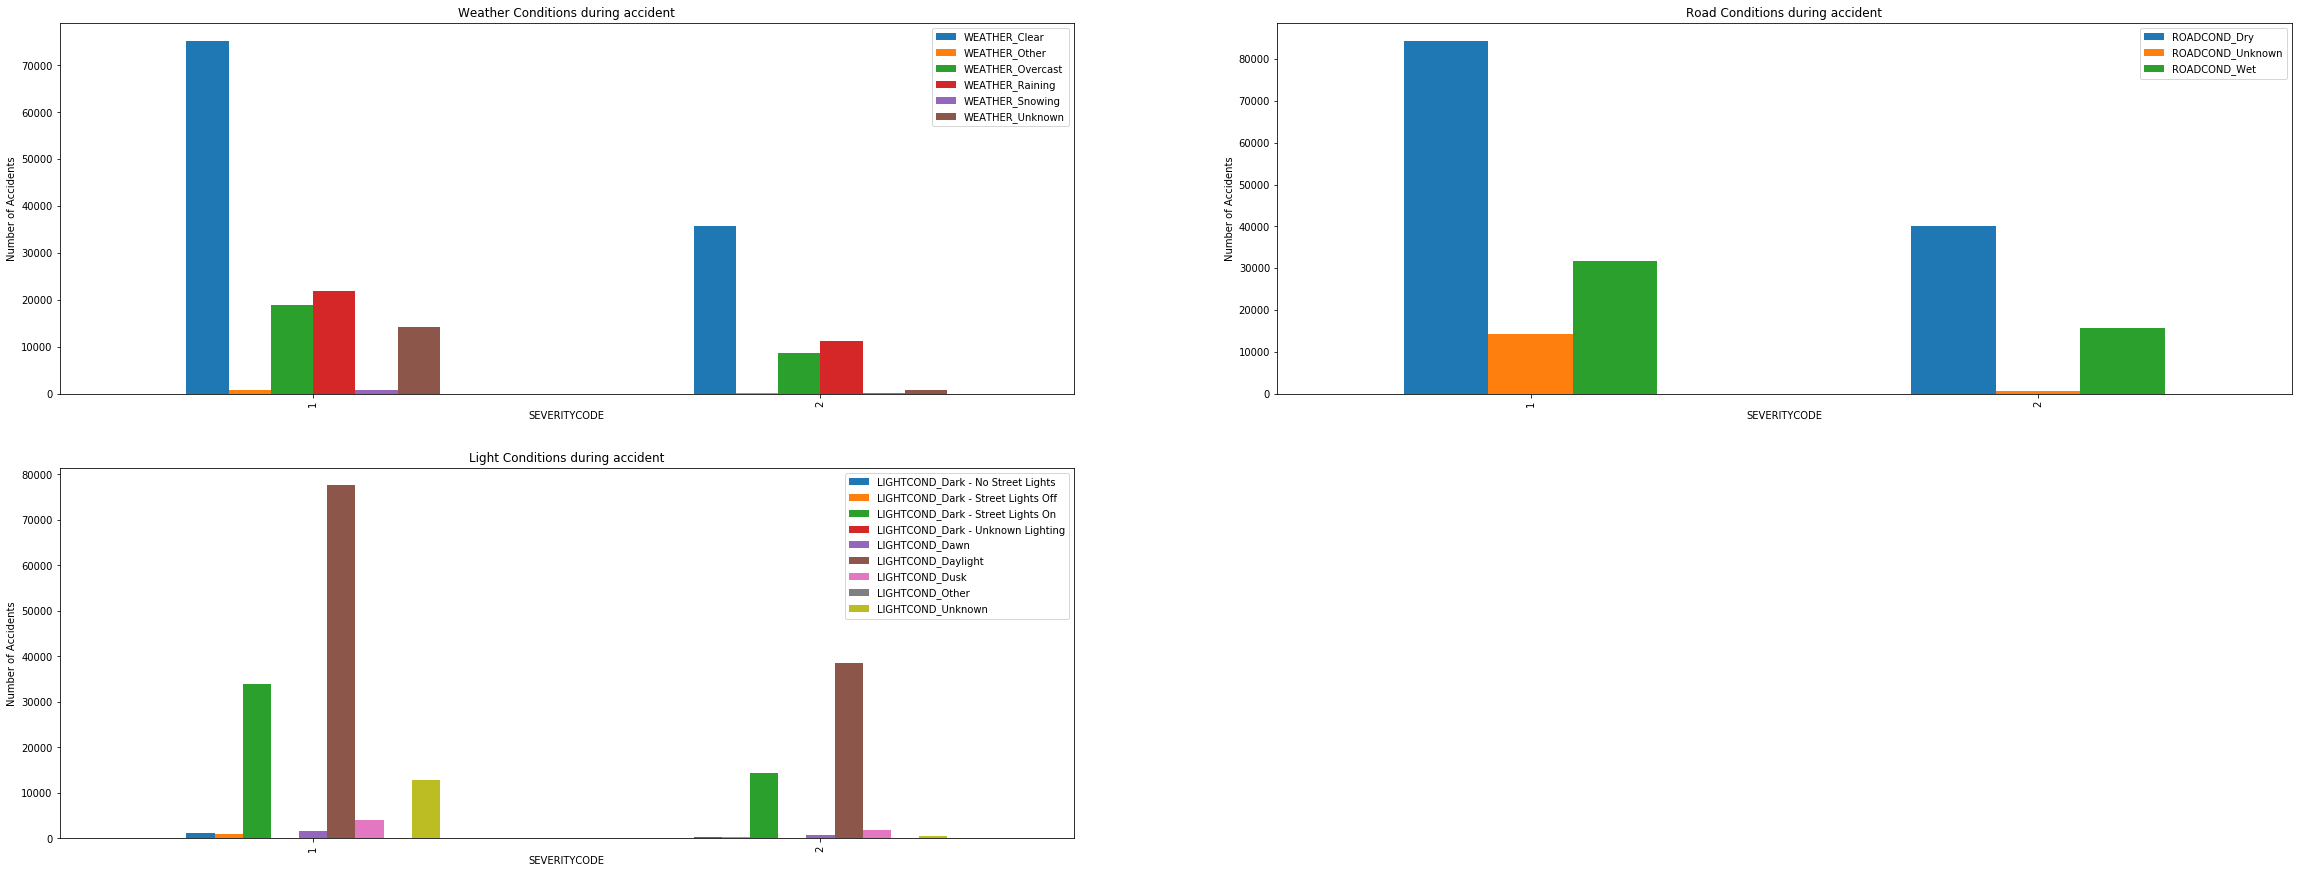

In [299]:
#Plot to see Trends
import matplotlib.pyplot as plt
%matplotlib inline  
fig = plt.figure() # create figure

ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)


ax0.set_ylabel('Number of Accidents')
ax0.set_title('Weather Conditions during accident')
ax1.set_ylabel('Number of Accidents')
ax1.set_title('Road Conditions during accident')
ax2.set_ylabel('Number of Accidents')
ax2.set_title('Light Conditions during accident')

stats_nature[['WEATHER_Clear', 'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Raining','WEATHER_Snowing', 'WEATHER_Unknown']].plot.bar(figsize=(40, 15),ax = ax0)
stats_nature[['ROADCOND_Dry','ROADCOND_Unknown', 'ROADCOND_Wet']].plot.bar(ax = ax1)
stats_nature[['LIGHTCOND_Dark - No Street Lights','LIGHTCOND_Dark - Street Lights Off','LIGHTCOND_Dark - Street Lights On','LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn','LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other','LIGHTCOND_Unknown']].plot.bar(ax = ax2)

### Trends:
- Weather:     <br> Severe Accidents more likely when: ‘Rainy’, ‘Overcast’ <br><br>
    
- Light Conditions:        <br> Severe Accidents more likely when: ‘Dark’ <br><br>
    
- Road Conditions:        <br> Severe Accidents more likely when: ‘Wet’ <br><br>


## Human Failure

In [179]:
#Group Data
df_human = df[['INATTENTIONIND', 'UNDERINFL','SPEEDING']]
df_human = pd.get_dummies(df_human[0:1000])
df_human = pd.concat([df['SEVERITYCODE'], df_human], axis = 1)

In [184]:
#Preprocess data
#Map everything to 0 or 1
mapping = {'N':0 , 'Y':1 }
df_human.replace({'UNDERINFL_0': mapping,'UNDERINFL_1':mapping}, inplace = True)
#df_human.drop(['UNDERINFL_0','UNDERINFL_1'], axis = 1, inplace= True)
df_human.head()

,SEVERITYCODE,INATTENTIONIND_Y,UNDERINFL_0,UNDERINFL_1,UNDERINFL_N,UNDERINFL_Y,SPEEDING_Y
0,2,0.0,0.0,0.0,1.0,0.0,0.0
1,1,0.0,1.0,0.0,0.0,0.0,0.0
2,1,0.0,1.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0.0,1.0,0.0,0.0,0.0,0.0


In [185]:
df_human['UNDERINFL_N'] = pd.concat([df_human['UNDERINFL_0'], df_human['UNDERINFL_N']], axis = 1)
df_human['UNDERINFL_Y'] = pd.concat([df_human['UNDERINFL_1'], df_human['UNDERINFL_Y']], axis = 1)
df_human.head()

,SEVERITYCODE,INATTENTIONIND_Y,UNDERINFL_0,UNDERINFL_1,UNDERINFL_N,UNDERINFL_Y,SPEEDING_Y
0,2,0.0,0.0,0.0,0.0,0.0,0.0
1,1,0.0,1.0,0.0,1.0,0.0,0.0
2,1,0.0,1.0,0.0,1.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,1.0,0.0,1.0,0.0,0.0


In [188]:
df_human.drop(['UNDERINFL_0','UNDERINFL_1'], axis = 1, inplace= True)

In [190]:
grouped = df_human.groupby('SEVERITYCODE')
stats_human = grouped.sum()
stats_human

,INATTENTIONIND_Y,UNDERINFL_N,UNDERINFL_Y,SPEEDING_Y
SEVERITYCODE,,,,
1,87.0,348.0,7.0,27.0
2,43.0,136.0,10.0,12.0


In [191]:
stats_human.columns

Index(['INATTENTIONIND_Y', 'UNDERINFL_N', 'UNDERINFL_Y', 'SPEEDING_Y'], dtype='object')

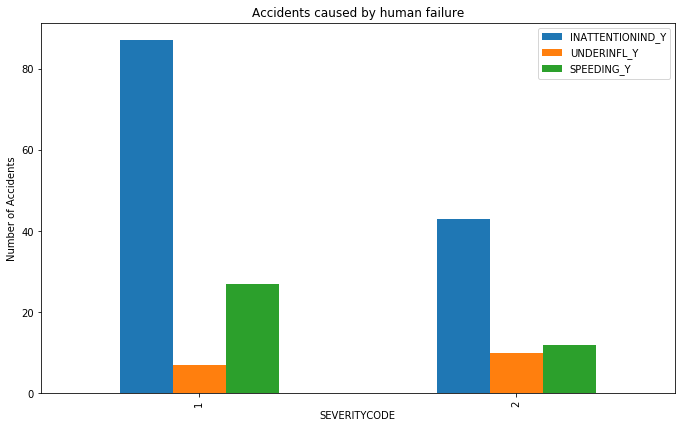

In [291]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(221)
ax0.set_title('Accidents caused by human failure')
ax0.set_ylabel('Number of Accidents')
stats_human[['INATTENTIONIND_Y', 'UNDERINFL_Y', 'SPEEDING_Y']].plot.bar(figsize=(25, 15),ax = ax0)

### Trends:
- Severe accidents are more likely to happen when Speeding and under influence. 

## Count accident participants

In [233]:
#df_counts = df[['SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]
df_perscounts = df[['PERSONCOUNT']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_perscounts = pd.concat([df_sev, df_perscounts], axis = 1)
grouped = df_perscounts.groupby('PERSONCOUNT')
stats_perscounts = grouped.sum()
stats_perscounts

,1,2
PERSONCOUNT,,
0,3782.0,1762.0
1,9858.0,3296.0
2,86420.0,27811.0
3,22092.0,13461.0
4,8365.0,6295.0
5,3615.0,2969.0
6,1345.0,1357.0
7,494.0,637.0
8,249.0,284.0


In [234]:
df_vecounts = df[['VEHCOUNT']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_vecounts = pd.concat([df_sev, df_vecounts], axis = 1)
grouped = df_vecounts.groupby('VEHCOUNT')
stats_vecounts = grouped.sum()
stats_vecounts

,1,2
VEHCOUNT,,
0,3858.0,1227.0
1,11643.0,14105.0
2,111701.0,35949.0
3,7540.0,5470.0
4,1348.0,1078.0
5,268.0,261.0
6,86.0,60.0
7,24.0,22.0
8,10.0,5.0


In [229]:
df_pedcylcounts = df[['PEDCYLCOUNT']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_pedcylcounts = pd.concat([df_sev, df_pedcylcounts], axis = 1)
grouped = df_pedcylcounts.groupby('PEDCYLCOUNT')
stats_pedcylcounts = grouped.sum()
stats_pedcylcounts

,1,2
PEDCYLCOUNT,,
0,135806.0,53383.0
1,679.0,4762.0
2,0.0,43.0


In [235]:
df_pedcounts = df[['PEDCOUNT']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_pedcounts = pd.concat([df_sev, df_pedcounts], axis = 1)
grouped = df_pedcounts.groupby('PEDCOUNT')
stats_pedcounts = grouped.sum()
stats_pedcounts

,1,2
PEDCOUNT,,
0,135787.0,51947.0
1,678.0,6007.0
2,19.0,207.0
3,1.0,21.0
4,0.0,4.0
5,0.0,1.0
6,0.0,1.0


Text(0.5, 1.0, 'Number of Vehicles involved in Accident')

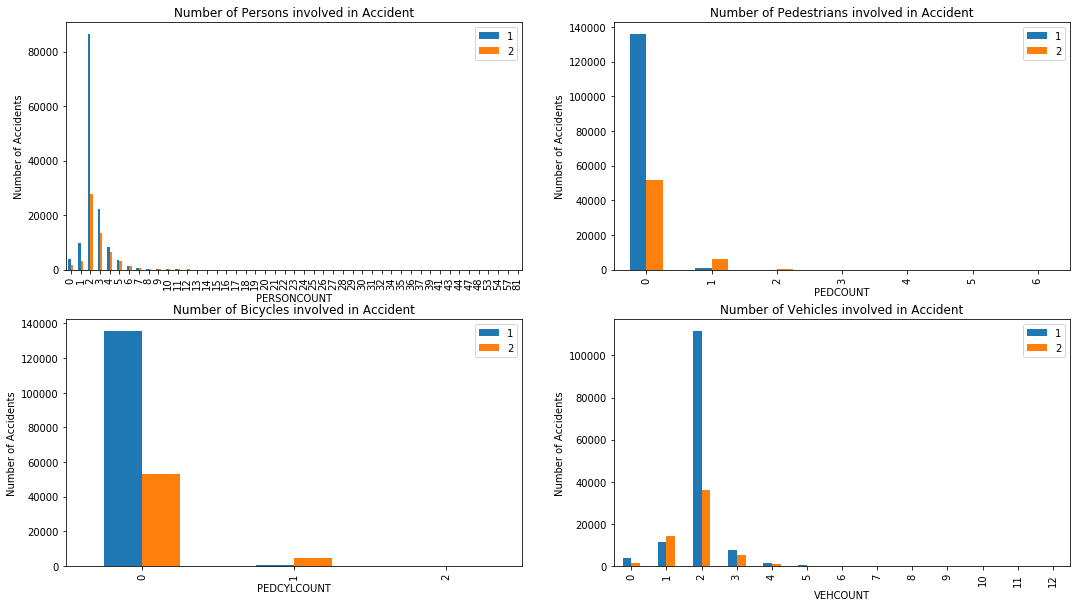

In [290]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(222)
ax2 = fig.add_subplot(223)
ax3 = fig.add_subplot(224)

stats_perscounts.plot.bar(figsize=(18, 10),ax = ax0)
stats_pedcounts.plot.bar(figsize=(18, 10),ax = ax1)
stats_pedcylcounts.plot.bar(figsize=(18, 10),ax = ax2)
stats_vecounts.plot.bar(figsize=(18, 10),ax = ax3)
ax0.set_ylabel('Number of Accidents')
ax1.set_ylabel('Number of Accidents')
ax2.set_ylabel('Number of Accidents')
ax3.set_ylabel('Number of Accidents')
ax0.set_title('Number of Persons involved in Accident')
ax1.set_title('Number of Pedestrians involved in Accident')
ax2.set_title('Number of Bicycles involved in Accident')
ax3.set_title('Number of Vehicles involved in Accident')
#stats_nature[['ROADCOND_Dry','ROADCOND_Unknown', 'ROADCOND_Wet']].plot.bar(ax = ax1)
#stats_nature[[]].plot.bar(ax = ax2)

## Trends:
- Persons:<br> The more persons involved, the more likely it is for the accident to be severe <br><br>

- Pedestrians and Bicycle riders:<br>If pedestrians and bicycle riders are involved, the accident is likely to be severe. <br> <br>

- Vehicle: <br> The accident is likely to be severe when more vehicles are involved <br> <br>


## Location Analysis

### 1. Location types


In [237]:
df['JUNCTIONTYPE'].unique()

array(['At Intersection (intersection related)',
       'Mid-Block (not related to intersection)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'At Intersection (but not related to intersection)', nan,
       'Unknown', 'Ramp Junction'], dtype=object)

In [241]:
df['ADDRTYPE'].unique()

array(['Intersection', 'Block', 'Alley', nan], dtype=object)

In [283]:
df_loc = df[['JUNCTIONTYPE','ADDRTYPE']]
df_loc = pd.get_dummies(df_loc)
df_loc = pd.concat([df['SEVERITYCODE'], df_loc], axis = 1)
grouped = df_loc.groupby('SEVERITYCODE')
stats_loc = grouped.sum()
stats_loc.rename({'JUNCTIONTYPE_At Intersection (but not related to intersection)':'At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)':'At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction':'Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)':'Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)':'Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Unknown':'Unknown', 'ADDRTYPE_Alley':'Alley', 'ADDRTYPE_Block':'Block',
       'ADDRTYPE_Intersection':'Intersection'})

,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,ADDRTYPE_Alley,ADDRTYPE_Block,ADDRTYPE_Intersection
SEVERITYCODE,,,,,,,,,,
1,1475.0,35636.0,7437.0,15493.0,70396.0,112.0,7.0,669.0,96830.0,37251.0
2,623.0,27174.0,3234.0,7297.0,19404.0,54.0,2.0,82.0,30096.0,27819.0


In [284]:
stats_loc.rename(columns = {'JUNCTIONTYPE_At Intersection (but not related to intersection)':'At Intersection (but not related to intersection)',
       'JUNCTIONTYPE_At Intersection (intersection related)':'At Intersection (intersection related)',
       'JUNCTIONTYPE_Driveway Junction':'Driveway Junction',
       'JUNCTIONTYPE_Mid-Block (but intersection related)':'Mid-Block (but intersection related)',
       'JUNCTIONTYPE_Mid-Block (not related to intersection)':'Mid-Block (not related to intersection)',
       'JUNCTIONTYPE_Unknown':'Unknown', 'ADDRTYPE_Alley':'Alley', 'ADDRTYPE_Block':'Block',
       'ADDRTYPE_Intersection':'Intersection'}, inplace = True)

In [285]:
stats_loc.columns

Index(['At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)', 'JUNCTIONTYPE_Ramp Junction',
       'Unknown', 'Alley', 'Block', 'Intersection'],
      dtype='object')

Text(0.5, 1.0, 'Addresstype')

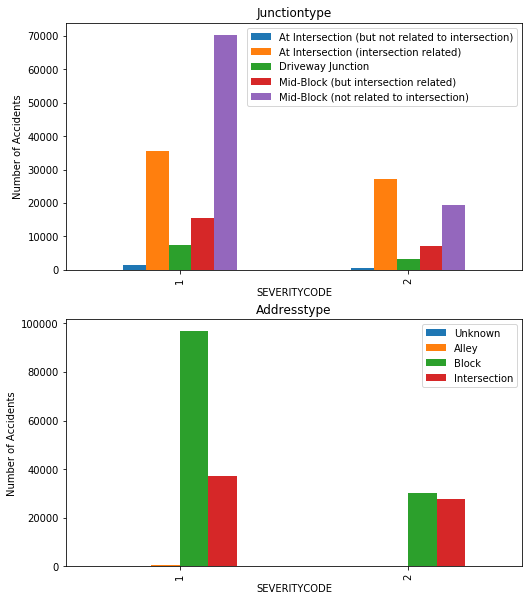

In [288]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(221)
ax1 = fig.add_subplot(223)

stats_loc[['At Intersection (but not related to intersection)',
       'At Intersection (intersection related)', 'Driveway Junction',
       'Mid-Block (but intersection related)',
       'Mid-Block (not related to intersection)']].plot.bar(figsize=(30, 25),ax = ax0)
ax0.set_ylabel('Number of Accidents')
ax0.set_title('Junctiontype')
stats_loc[['Unknown', 'Alley', 'Block','Intersection']].plot.bar(figsize=(18, 10),ax = ax1)
ax1.set_ylabel('Number of Accidents')
ax1.set_title('Addresstype')

## Trends:
- Severe accidents are more likely to happen at intersection

### 2. Locations

To find the most common places for accidents to happen, I converted all elements from the location attribute in a list of strings and extracted the most common ones. 

In [248]:
#Location Analysis - > See where most Accidents happen
def convert_list_to_string(org_list, seperator=' '):
    """ Convert list to string, by joining all item in list with given separator.
        Returns the concatenated string """
        return seperator.join(org_list)

In [264]:
stringlist = convert_list_to_string(list(df['LOCATION'].astype(str).unique()))
#stringlist

In [266]:
from collections import Counter 
# split() returns list of all the words in the string 
split_it =  stringlist.split() 
  
# Pass the split_it list to instance of Counter class. 
Counter = Counter(split_it) 
  
# most_common() produces k frequently encountered 
# input values and their respective counts. 
most_occur = Counter.most_common(100) 
  
print(most_occur) 

[('ST', 28030), ('AVE', 27716), ('AND', 24104), ('BETWEEN', 16491), ('S', 15619), ('NE', 10026), ('N', 9381), ('SW', 8016), ('E', 6375), ('NW', 6121), ('W', 4429), ('WAY', 3504), ('PL', 1809), ('1ST', 858), ('DEAD', 835), ('END', 835), ('15TH', 781), ('RP', 687), ('8TH', 670), ('DR', 665), ('5TH', 603), ('4TH', 581), ('3RD', 580), ('6TH', 574), ('KING', 547), ('35TH', 535), ('2ND', 532), ('LAKE', 522), ('12TH', 510), ('45TH', 494), ('17TH', 494), ('14TH', 491), ('24TH', 481), ('42ND', 479), ('20TH', 479), ('30TH', 464), ('39TH', 458), ('23RD', 441), ('JR', 440), ('M', 439), ('L', 439), ('32ND', 428), ('16TH', 421), ('9TH', 407), ('25TH', 400), ('36TH', 391), ('22ND', 389), ('11TH', 383), ('65TH', 383), ('26TH', 380), ('46TH', 371), ('34TH', 370), ('28TH', 366), ('41ST', 363), ('40TH', 363), ('RAINIER', 358), ('50TH', 357), ('AURORA', 356), ('38TH', 356), ('WR', 355), ('7TH', 352), ('31ST', 345), ('SPOKANE', 344), ('ER', 344), ('BLVD', 344), ('BEACON', 342), ('37TH', 342), ('47TH', 337)

It seems like the most accidents occur 
-	In ‘Dead Ends’
-	Along 1st, Beacon and Aurora Avenue 
-	More in the South



### 3. Location Clustering with geographic Coordinates

In [615]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium

Solving environment: done

## Package Plan ##

  environment location: /Users/nataschahey/opt/anaconda3

  added / updated specs:
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.8.5                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.0 MB

The following packages will be UPDATED:

  conda                                4.8.4-py37hc8dfbb8_2 --> 4.8.5-py37hc8dfbb8_1



conda-4.8.5          | 3.0 MB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [631]:
df2xy = df1[['X','Y']].dropna()
np.where(np.isnan(df2xy))
df2xy.head()

,X,Y
0,-122.323148,47.703140
1,-122.347294,47.647172
2,-122.334540,47.607871
3,-122.334803,47.604803
4,-122.306426,47.545739


In [681]:
latitude = (df.Y.min()+ df.Y.max())/2
longitude = (df.X.min() + df.X.max())/2
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

incidents = folium.map.FeatureGroup()
df2xy = df1[['SEVERITYCODE','X','Y']].dropna()

for lat, lng, in zip(df2xy.Y[0:200], df2xy.X[0:200]):
    incidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

In [682]:
latitude = (df.Y.min()+ df.Y.max())/2
longitude = (df.X.min() + df.X.max())/2

seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)
seattle_map

In [683]:
df2xy = df1[['SEVERITYCODE','X','Y']].dropna()

accidents = folium.map.FeatureGroup()

for lat, lng, in zip(df2xy.Y[0:200], df2xy.X[0:200]):
    accidents.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )
seattle_map.add_child(accidents)

In [684]:
df2xy1 = df2xy.loc[df2xy['SEVERITYCODE'] == 1]
df2xy2 = df2xy.loc[df2xy['SEVERITYCODE'] == 2]

latitudes1 = list(df2xy1.Y[0:200])
longitudes1 = list(df2xy1.X[0:200])
labels1 = list(df2xy1.SEVERITYCODE.values.astype(str))

latitudes2 = list(df2xy2.Y[0:200])
longitudes2 = list(df2xy2.X[0:200])
labels2 = list(df2xy2.SEVERITYCODE.values.astype(str))


for lat, lng, label in zip(latitudes1, longitudes1, labels1):
    folium.Marker([lat, lng], popup=label, icon = folium.Icon(color = 'blue')).add_to(seattle_map)   

for lat, lng, label in zip(latitudes2, longitudes2, labels2):
    folium.Marker([lat, lng], popup=label, icon = folium.Icon(color = 'red')).add_to(seattle_map)   




In [685]:
seattle_map

## Clustering of Location

In [569]:
df_xy = df1[['SEVERITYCODE','X','Y']]

In [750]:
#Install mlxtend to visualize K clusters
pip install mlxtend  

In [502]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

In [570]:
df_xy

,SEVERITYCODE,X,Y
0,2,-122.323148,47.703140
1,1,-122.347294,47.647172
2,1,-122.334540,47.607871
3,1,-122.334803,47.604803
4,2,-122.306426,47.545739
...,...,...,...
194668,2,-122.290826,47.565408
194669,1,-122.344526,47.690924
194670,2,-122.306689,47.683047
194671,2,-122.355317,47.678734


In [585]:
#Preprocess data
df_xy = df_xy.dropna()
df_xy[['X','Y']].values.astype(float)
y = df_xy['SEVERITYCODE'].values.astype(float)

df_xy_array = preprocessing.StandardScaler().fit(df_xy[['X','Y']]).transform(df_xy[['X','Y']])

df_xy_pd = pd.DataFrame(df_xy_array)
df_xy = pd.concat([df_xy['SEVERITYCODE'], df_xy_pd], axis=1) 

In [574]:
df_xy.rename(columns = {0 : 'X', 1 : 'Y'}, inplace = True)                   
df_xy.head()

,SEVERITYCODE,X,Y
0,2.0,0.245865,1.488658
1,1.0,-0.559644,0.492017
2,1.0,-0.134159,-0.207832
3,1.0,-0.142943,-0.262474
4,2.0,0.803715,-1.314239


In [577]:
#Define function to plot the Data


def knn_comparison(data, k):
 x = data[['X','Y']].values
 y = data['SEVERITYCODE'].values.astype(int)
 clf = neighbors.KNeighborsClassifier(n_neighbors=k)
 clf.fit(x, y)
# Plotting decision region
 plot_decision_regions(x, y, clf=clf, legend=2)
# Adding axes annotations
 BBox = (data.X.min(),data.X.max(),data.Y.min(), data.Y.max())
 plt.xlabel('X')
 plt.ylabel('Y')
 plt.title('Knn with K='+ str(k))
 plt.xlim(BBox[0],BBox[1])
 plt.ylim(BBox[2],BBox[3])
 plt.show()

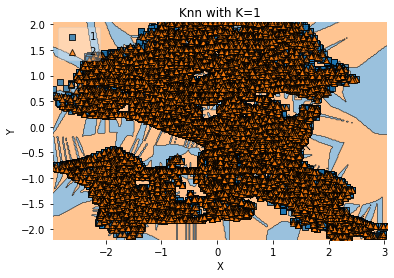

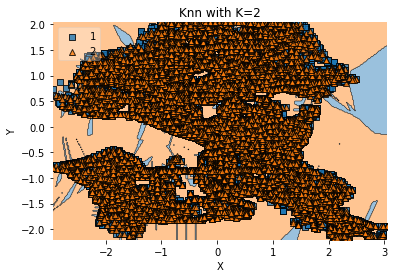

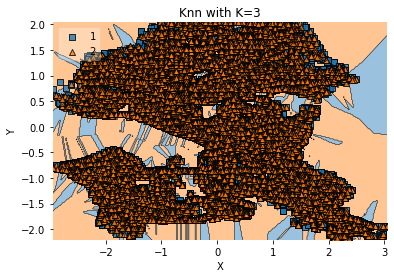

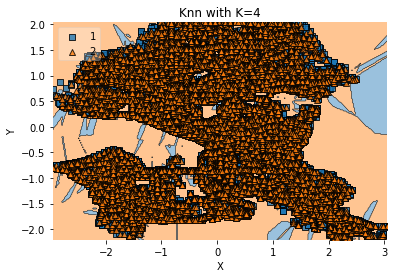

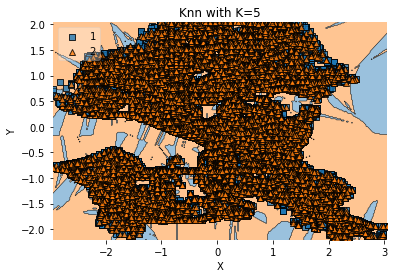

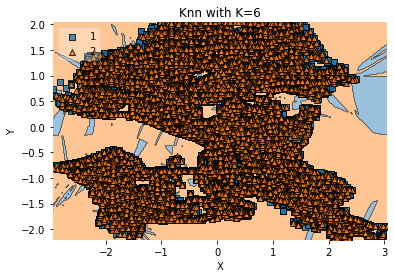

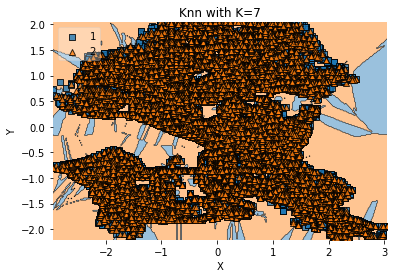

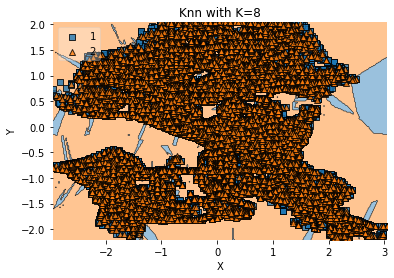

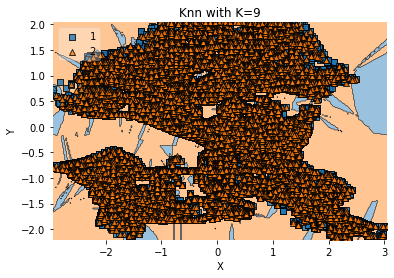

In [580]:
for i in range(1,10):
    knn_comparison(df_xy, i)


/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]
/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]
/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-

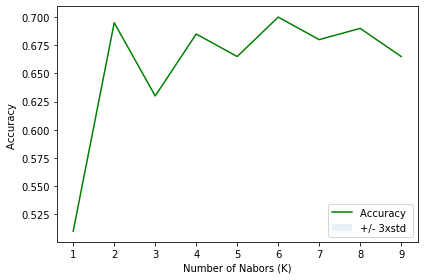

The best accuracy was with 0.7 with k= 6


In [584]:
#Test accuracy for different k on test set

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(df_xy[['X','Y']][0:1000],df_xy[['SEVERITYCODE']][0:1000])
    yhat=neigh.predict(df_xy[['X','Y']][1500:1700])
    mean_acc[n-1] = metrics.accuracy_score(df_xy[['SEVERITYCODE']][1500:1700], yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


#Plot Accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

## Time of the Day and Year

In [308]:
#Work with Month and Time when most accidents happen
df['INCDTTM'].head()
df['MONTH'] = pd.DatetimeIndex(df['INCDTTM']).month
df['TIME']= pd.DatetimeIndex(df['INCDTTM']).time
df[['TIME','MONTH']].head()

,TIME,MONTH
0,14:54:00,3
1,18:55:00,12
2,10:20:00,11
3,09:26:00,3
4,08:04:00,1


In [309]:
df_time = pd.concat([df['SEVERITYCODE'], df['TIME'], df['MONTH']], axis = 1)
df_time.head()

,SEVERITYCODE,TIME,MONTH
0,2,14:54:00,3
1,1,18:55:00,12
2,1,10:20:00,11
3,1,09:26:00,3
4,2,08:04:00,1


In [310]:
df_time['Time']= pd.DatetimeIndex(df['INCDTTM']).hour
df_time.drop('TIME',inplace = True)
df_time.head()

,SEVERITYCODE,TIME,MONTH,Time
0,2,14:54:00,3,14
1,1,18:55:00,12,18
2,1,10:20:00,11,10
3,1,09:26:00,3,9
4,2,08:04:00,1,8


In [312]:
df_time.drop(columns = 'TIME',axis = 1, inplace = True)
df_time.head()

,SEVERITYCODE,MONTH,Time
0,2,3,14
1,1,12,18
2,1,11,10
3,1,3,9
4,2,1,8


In [316]:
df_time['Time'].unique()

array([14, 18, 10,  9,  8, 17,  0, 13, 15, 12,  2, 20, 16, 22,  6, 11, 19,
        7, 21,  1,  3, 23,  5,  4])

In [313]:
df_month= df_time[['MONTH']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_month = pd.concat([df_sev, df_month], axis = 1)
grouped = df_month.groupby('MONTH')
stats_month= grouped.sum()
stats_month

,1,2
MONTH,,
1,11704.0,4703.0
2,10293.0,4097.0
3,11415.0,4735.0
4,11216.0,4762.0
5,11567.0,5196.0
6,11638.0,4928.0
7,11227.0,5137.0
8,11214.0,5082.0
9,11053.0,4811.0


In [314]:
df_time1= df_time[['Time']]
df_sev = pd.get_dummies(df['SEVERITYCODE'])
df_time1 = pd.concat([df_sev, df_time1], axis = 1)
grouped = df_time1.groupby('Time')
stats_time1= grouped.sum()
stats_time1

,1,2
Time,,
0,25129.0,9252.0
1,2577.0,831.0
2,2736.0,870.0
3,1316.0,349.0
4,950.0,272.0
5,1178.0,489.0
6,2182.0,1017.0
7,4389.0,2154.0
8,5878.0,2692.0


Text(0.5, 1.0, 'Times of Accidents')

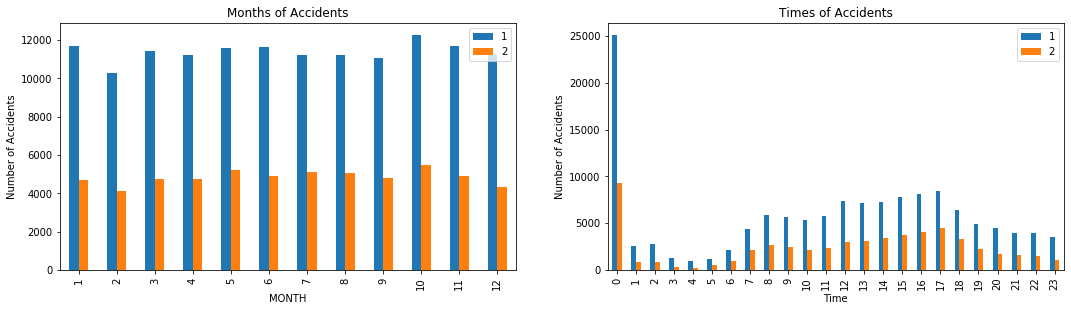

In [315]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(221) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(222)


stats_month.plot.bar(figsize=(18, 10),ax = ax0)
stats_time1.plot.bar(figsize=(18, 10),ax = ax1)

ax0.set_ylabel('Number of Accidents')
ax1.set_ylabel('Number of Accidents')

ax0.set_title('Months of Accidents')
ax1.set_title('Times of Accidents')


## Trends
- Months: <br> (Severe) accidents are more likely to happen in October <br><br>
- Time: <br> Severe accidents are more likely to happen during rush-hour (4-5PM) and at midnight <br><br>


# Results <a name="results"></a>

## Machine learning Algorithms
### 1. Preprocessing

In [347]:
X = pd.concat([df_time, df_loc, df_nature, df_human, df[['SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]],axis = 1)


(array([  1000,   1000,   1000, ..., 194672, 194672, 194672]),
 array([45, 46, 47, ..., 46, 47, 48]))

In [350]:
X.drop('SEVERITYCODE',axis = 1, inplace = True)

In [351]:
X.head()

,MONTH,Time,JUNCTIONTYPE_At Intersection (but not related to intersection),JUNCTIONTYPE_At Intersection (intersection related),JUNCTIONTYPE_Driveway Junction,JUNCTIONTYPE_Mid-Block (but intersection related),JUNCTIONTYPE_Mid-Block (not related to intersection),JUNCTIONTYPE_Ramp Junction,JUNCTIONTYPE_Unknown,ADDRTYPE_Alley,...,LIGHTCOND_Other,LIGHTCOND_Unknown,INATTENTIONIND_Y,UNDERINFL_N,UNDERINFL_Y,SPEEDING_Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
0,3,14,0,1,0,0,0,0,0,0,...,0,0,0.0,0.0,0.0,0.0,2,0,0,2
1,12,18,0,0,0,0,1,0,0,0,...,0,0,0.0,1.0,0.0,0.0,2,0,0,2
2,11,10,0,0,0,0,1,0,0,0,...,0,0,0.0,1.0,0.0,0.0,4,0,0,3
3,3,9,0,0,0,0,1,0,0,0,...,0,0,0.0,0.0,0.0,0.0,3,0,0,3
4,1,8,0,1,0,0,0,0,0,0,...,0,0,0.0,1.0,0.0,0.0,2,0,0,2


In [352]:
X.values.astype(float)
y = df['SEVERITYCODE'].values.astype(float)

In [353]:
from sklearn import preprocessing
X= preprocessing.StandardScaler().fit(X).transform(X)
X.shape

(194673, 49)

In [359]:
#Check for NAN values

np.where(np.isnan(X))
X = np.nan_to_num(X)
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

________________________________________________________________________
<br><br><br><br><br><br><br><br><br>
<br>










# TRAIN WITH LOCATION DATA

In [589]:
X2 = pd.concat([df1[['X','Y']], df_time, df_loc, df_nature, df_human, df[['SEVERITYCODE','PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT']]],axis = 1)
X2.drop('SEVERITYCODE',axis = 1, inplace = True)
X2.values.astype(float)
y2 = df['SEVERITYCODE'].values.astype(float)
X2 = np.nan_to_num(X2)
X2= preprocessing.StandardScaler().fit(X2).transform(X2)
X2.shape

(194673, 51)

In [590]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split( X2[1000:4000], y2[1000:4000], test_size=0.2, random_state=4)
print ('Train set:', X2_train.shape,  y2_train.shape)
print ('Test set:', X2_test.shape,  y2_test.shape)

Train set: (2400, 51) (2400,)
Test set: (600, 51) (600,)


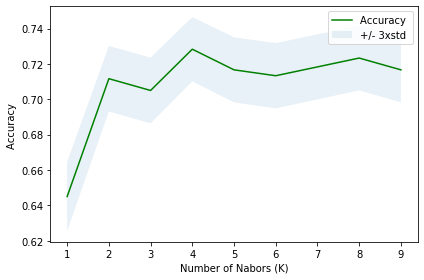

The best accuracy was with 0.7283333333333334 with k= 4


In [591]:
#Test for more Ks
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X2_train,y2_train)
    y2hat=neigh.predict(X2_test)
    mean_acc[n-1] = metrics.accuracy_score(y2_test, y2hat)

    
    std_acc[n-1]=np.std(y2hat==y2_test)/np.sqrt(y2hat.shape[0])

mean_acc


#Plot Accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

_______________________________________________________________________________________
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>

## 2. Classification

### KNN

In [456]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X[1000:4000], y[1000:4000], test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2400, 49) (2400,)
Test set: (600, 49) (600,)


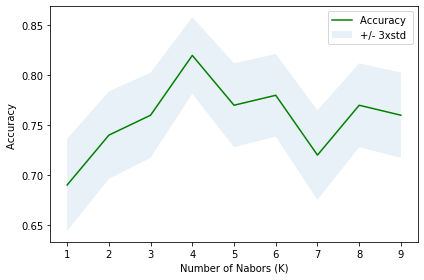

The best accuracy was with 0.82 with k= 4


In [442]:
#Test for more Ks
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc


#Plot Accuracy
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

In [443]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

#Predicting
yhat = neigh.predict(X_test)
yhat[0:5]

#Accuracy Evaluation
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))


Train set Accuracy:  0.785
Test set Accuracy:  0.82


In [444]:
#Jaccard Index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.82

Confusion matrix, without normalization
[[71  4]
 [14 11]]
Normalized confusion matrix
[[0.95 0.05]
 [0.56 0.44]]


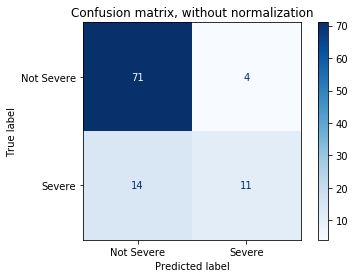

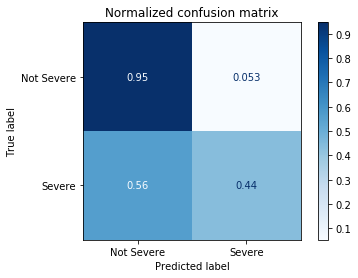

In [445]:
from sklearn.metrics import plot_confusion_matrix
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(neigh, X_test, y_test,
                                 display_labels=['Not Severe','Severe'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    
plt.show()

In [446]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.803125

### Logistic Regression

In [447]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(C=0.5, solver='newton-cg').fit(X_train,y_train)

#Predict
yhat = LR.predict(X_test)

#Return the probability for each class (Column1 for churn =1, Column2 for churn = 0 )
yhat_prob = LR.predict_proba(X_test)


In [448]:
#Jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.81

In [449]:
#F1 Score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

0.7896958114349418

In [450]:
#LogLoss
from sklearn.metrics import log_loss
log_loss(y_test, yhat_prob)

0.4937872465696275

Confusion matrix, without normalization
[[71  4]
 [15 10]]
Normalized confusion matrix
[[0.95 0.05]
 [0.6  0.4 ]]


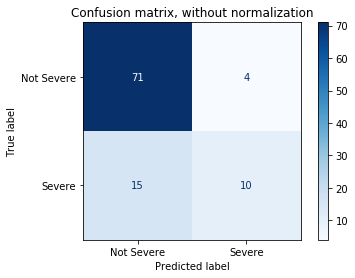

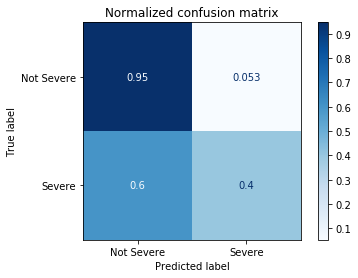

In [451]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(LR, X_test, y_test,
                                 display_labels=['Not Severe','Severe'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    
plt.show()

### SVM


In [452]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
svm_fit= clf.fit(X_train, y_train) 

#Predict
yhat = clf.predict(X_test)

Confusion matrix, without normalization
[[73  2]
 [17  8]]
Normalized confusion matrix
[[0.97 0.03]
 [0.68 0.32]]


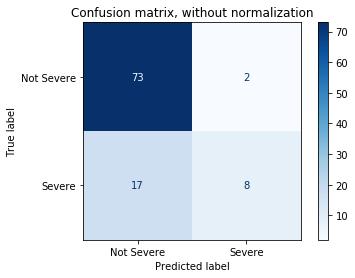

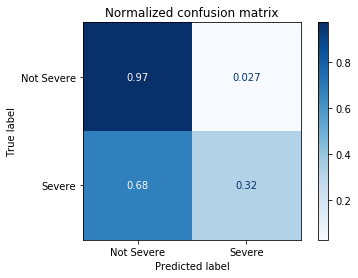

In [453]:
for title, normalize in titles_options:
    disp = plot_confusion_matrix(svm_fit, X_test, y_test,
                                 display_labels=['Not Severe','Severe'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    
plt.show()

In [454]:
#Get F1 score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 


0.7779220779220779

In [455]:
#Get jaccard index
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

/Users/nataschahey/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


0.81

# Discussion <a name="discussion"></a>

The **KNN** algorithm delivers the best result for **k = 4** with a **F1 score of 0.803** and a **Jaccard index of 0.82**.

- Problem <br> It is very good in predicting not severe Accidents. However, it labels many data as “not severe” even though the accident was severe. The problem is that there much data in factors like ‘speeding’ were not available, because the police couldn’t find a prove for it. This is the same case for ‘inattention’.<br> Additionally, the dataset was in general unbalanced with a ratio 13:5 of not severe accidents to severe accidents.

- More Data needed <br> One very common indication of a severe accident is the level of speed. Speeding (exceeding the speed limit) is not necessarily the case. But rather the accident could happen on a highway. Therefore, to get a more accurate result, the speed of the car before the accident had happened and the allowed speed limit should be included into the dataset. Furthermore, street types such as highways or roads should be another categorical variable in the dataset. <br> Nevertheless, for the given dataset the algorithm performs well given the dataset. 



# Conclusion <a name="conclusion"></a>

As suggested, the most important features which contribute to the probability of severe accidents are hazardous areas like junctions, weather conditions, human failure, number of accident participants and the time of the accident. Additionally, the location given by geographical coordinates can also contribute to determine whether or not a severe accident is likely to happen. Therefore, to provide the best estimation of danger for a driver, it is important to analyze:

- his upcoming route with the most dangerous zones given by a KNN clustering.
- if the driver is not under influence and is reminded not to speed.
- the weather, lighting and road conditions.
- the time of the day and the year. For if it is late and autumn or winter, severe accidents are more likely to happen.

**Opportunity:**

To warn a driver before starting his ride, applications can be developed for cities to take those collision statistics into account. Those warning systems could even be integrated in GPS devices.
